In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def load_and_resize_images(filename, foldername="",size=(64,64)):
    if(foldername!=""):
        foldername+="/"
    if(filename[-4:]=='.jpg' or filename[-5:]=='.jpeg' or filename[-4:]=='.png'):
        input_img_color = cv2.imread(foldername+f"{filename}")
        # img_resized = cv2.resize(input_img_color,size)
        img_resized_rgb = cv2.cvtColor(input_img_color, cv2.COLOR_BGR2RGB)
        return img_resized_rgb


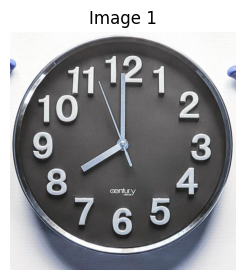

In [34]:
img_path = "Naman/cropped_real_world/Images/78.jpg"
img1 = load_and_resize_images(img_path)
# img2 = load_and_resize_images("image2.jpg")
plt.figure()
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Image 1")
plt.imshow(img1)


In [35]:
# Function to display images with their respective labels
def get_segmented_images(img, labels, num_clusters):
    segmented_img = np.zeros_like(img)
    labels = labels.reshape(img.shape[:2])
    for cluster_idx in range(num_clusters):
        cluster_mask = (labels == cluster_idx)
        if np.any(cluster_mask):
            segmented_img[cluster_mask] = np.mean(img[cluster_mask], axis=0)
    return segmented_img

[1 1 1 ... 1 1 1]


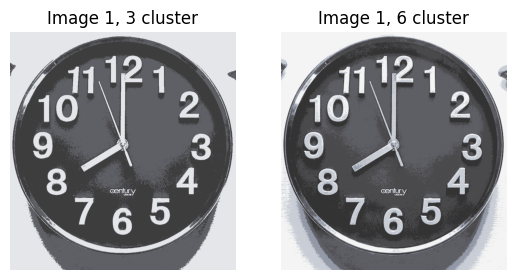

In [39]:

def image_to_feature_vector(image):
    return image.reshape(-1, 3)

def kmeans_clustering(img, num_of_clusters):
    kmeans = KMeans(n_clusters=num_of_clusters, n_init=10, random_state=42)
    features = image_to_feature_vector(img)
    # print(features.shape)
    kmeans.fit(features)
    return kmeans.labels_

img_path = "Naman/cropped_real_world/Images/78.jpg"
img1 = load_and_resize_images(img_path)

# Perform K-means clustering with 3 and 6 clusters
kmeans_labels_3_image1 = kmeans_clustering(img1, 3)
kmeans_labels_6_image1 = kmeans_clustering(img1, 6)

print(kmeans_labels_3_image1)

kmeans_segmented_3_image_1 = get_segmented_images(img1,kmeans_labels_3_image1,3)
kmeans_segmented_6_image_1 = get_segmented_images(img1,kmeans_labels_6_image1,6)


plt.figure()
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Image 1, 3 cluster")
plt.imshow(kmeans_segmented_3_image_1)

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Image 1, 6 cluster")
plt.imshow(kmeans_segmented_6_image_1)

plt.show()

(892, 844)


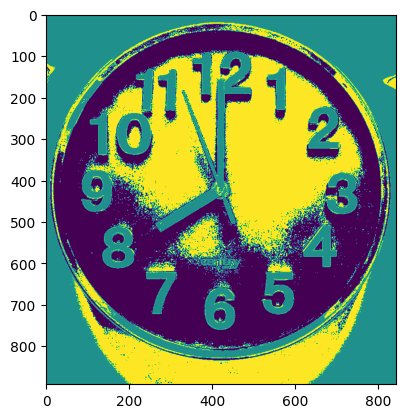

In [45]:
print(kmeans_labels_3_image1.shape)
kmeans_labels_3_image1= kmeans_labels_3_image1.reshape(img1.shape[:2])

plt.imshow(kmeans_labels_3_image1)

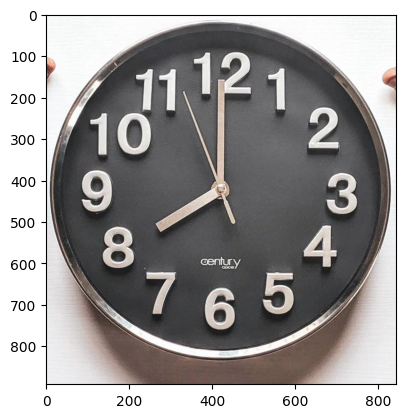

In [29]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('Naman/cropped_real_world/Images/78.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.imshow(img)

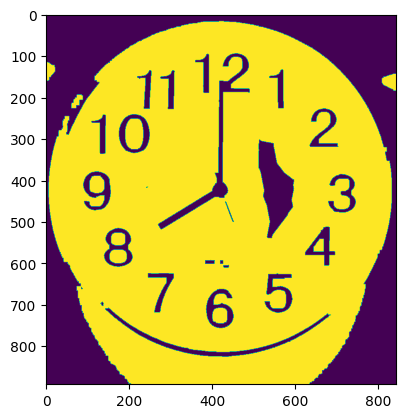

In [30]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)

In [12]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0



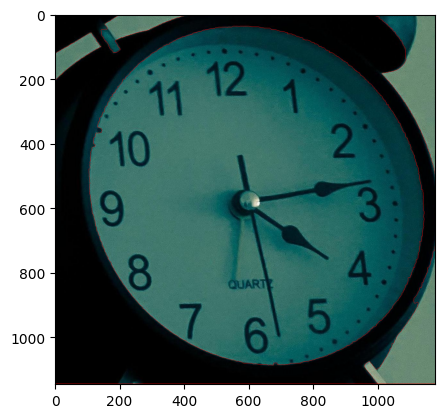

In [13]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)